## Previsão de Elegibilidade para Cartão de Crédito

### Passo 1: Visualização inicial dos Dados
Neste passo, iremos carregar o dataset e inspecioná-lo para entender sua estrutura e conteúdo.

In [3]:
import pandas as pd

In [13]:
data = pd.read_csv('dataset_credit.csv')
data['Income_type'].unique()#5
data['Education_type'].unique()#5
data['Family_status'].unique()#5
data['Housing_type'].unique()#6
data['Occupation_type'].unique()#19
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


### Passo 2: Tratamento dos Dados
Neste passo, iremos tratar os dados, verificando valores nulos e codificando variáveis categóricas, se necessário.

1) Dividindo os dados que serão utilizados como input e a coluna alvo

In [22]:
X = data.drop('Target', axis=1)
y = data['Target']

2) Verificando valores nulos

In [23]:
# Verificando valores nulos
X.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
dtype: int64

3) Codificando variáveis categóricas

In [16]:
# Codificando variáveis categóricas
category_columns = X.select_dtypes(include='object').columns #Esse comando seleciona as colunas do tipo object, porém poderia selecionar as colunas do tipo category manualmente , adicionando-as em um lista.
X_encoded = pd.get_dummies(X, columns=category_columns, drop_first=True)
X_encoded.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,False,False,False,True,False,False,False,False,False,False
1,5008806,1,1,1,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,True,False
2,5008808,0,0,1,0,1,1,0,0,1,...,False,False,False,False,False,False,True,False,False,False
3,5008812,0,0,1,0,0,0,1,0,1,...,False,False,False,True,False,False,False,False,False,False
4,5008815,1,1,1,1,1,1,0,0,2,...,False,False,False,False,False,False,False,False,False,False


Convertendo valores booleanos para 0 e 1

In [17]:
X_encoded = X_encoded.astype(int)
X_encoded.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
1,5008806,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,5008808,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5008812,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5008815,1,1,1,1,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


4) Normalização dos dados

In [50]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    'Num_children',
    'Num_family',
    'Account_length',
    'Total_income',
    'Age',
    'Years_employed'
]

scaler = MinMaxScaler()

normalized_X = X_encoded.copy()
normalized_X[columns_to_normalize] = scaler.fit_transform(normalized_X[columns_to_normalize])
normalized_X


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0.0,0.052632,...,0,0,0,1,0,0,0,0,0,0
1,5008806,1,1,1,0,0,0,0,0.0,0.052632,...,0,0,0,0,0,0,0,0,1,0
2,5008808,0,0,1,0,1,1,0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,5008812,0,0,1,0,0,0,1,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,5008815,1,1,1,1,1,1,0,0.0,0.052632,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0.0,0.052632,...,0,0,0,0,0,0,0,0,0,0
9705,5149055,0,0,1,1,1,0,0,0.0,0.052632,...,0,0,0,1,0,0,0,0,0,0
9706,5149729,1,1,1,0,0,0,0,0.0,0.052632,...,0,0,0,1,0,0,0,0,0,0
9707,5149838,0,0,1,0,1,1,0,0.0,0.052632,...,0,0,1,0,0,0,0,0,0,0


## Passo 3: Divisão dos dados
Neste passo, iremos dividir o dataset em conjuntos de treino e teste.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)

Verificando as dimnsões dos conjuntos

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7767, 49), (1942, 49), (7767,), (1942,))

### Passo 4: Treinamento e Avaliação dos modelos
Neste passo, iremos treinar e avaliar diversos modelos de machine learning.

#### Logistic Regression

In [80]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Treinando o modelo
lr_model = LogisticRegression(class_weight='balanced', random_state=0, max_iter=10000)
lr_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test)

#Avaliando o modelo
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Accuracy: ", accuracy_lr)
print("Classification Report:\n", report_lr)

Logistic Regression Accuracy:  0.527806385169928
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.53      0.66      1659
           1       0.15      0.50      0.24       283

    accuracy                           0.53      1942
   macro avg       0.51      0.52      0.45      1942
weighted avg       0.76      0.53      0.60      1942



#### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Treinando o modelo
dt_model = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)

# Avaliando o modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy: ", accuracy_dt)
print("Classification Report:\n", report_dt)

Decision Tree Accuracy:  0.849124613800206
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1659
           1       0.14      0.01      0.01       283

    accuracy                           0.85      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.75      0.85      0.79      1942



#### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy: ", accuracy_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy:  0.8553038105046344
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1659
           1       1.00      0.01      0.01       283

    accuracy                           0.86      1942
   macro avg       0.93      0.50      0.47      1942
weighted avg       0.88      0.86      0.79      1942



#### Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Treinando o modelo
gb_model = GradientBoostingClassifier(max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_gb = gb_model.predict(X_test)

# Avaliando o modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Accuracy: ", accuracy_gb)
print("Classification Report:\n", report_gb)

Gradient Boosting Accuracy:  0.8537590113285273
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.33      0.00      0.01       283

    accuracy                           0.85      1942
   macro avg       0.59      0.50      0.46      1942
weighted avg       0.78      0.85      0.79      1942



#### Support Vector (SVM)

In [57]:
from sklearn.svm import SVC

# Treinando o modelo
sv_model = SVC(random_state=42)
sv_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_sv = sv_model.predict(X_test)

# Avaliando o modelo
accuracy_sv = accuracy_score(y_test, y_pred_sv)
report_sv = classification_report(y_test, y_pred_sv)

print("SVM Accuracy: ", accuracy_sv)
print("Classification Report:\n", report_sv)

SVM Accuracy:  0.8542739443872297
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942



c:\Users\Gabri\Desktop\PUC-Rio 2\ml-study\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gabri\Desktop\PUC-Rio 2\ml-study\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gabri\Desktop\PUC-Rio 2\ml-study\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

#### K-Nearest Neighbors (KNN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Treinando o modelo
kn_model = KNeighborsClassifier(n_neighbors=8)
kn_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_kn = kn_model.predict(X_test)

# Avaliando o modelo
accuracy_kn = accuracy_score(y_test, y_pred_kn)
report_kn = classification_report(y_test, y_pred_kn)

print("KNeighbors Accuracy: ", accuracy_kn)
print("Classification Report:\n", report_kn)

KNeighbors Accuracy:  0.8527291452111225
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.20      0.00      0.01       283

    accuracy                           0.85      1942
   macro avg       0.53      0.50      0.46      1942
weighted avg       0.76      0.85      0.79      1942



### Passo 5: Comparação dos Modelos
Vamos comparar a eficácia dos modelos treinados.

In [74]:
# Comparando as acurácias dos modelos
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'SVM': accuracy_sv,
    'KNN': accuracy_kn
}

for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.5278
Decision Tree Accuracy: 0.8491
Random Forest Accuracy: 0.8553
Gradient Boosting Accuracy: 0.8538
SVM Accuracy: 0.8543
KNN Accuracy: 0.8527


#### Criando um gráfico para comparar as acurácias

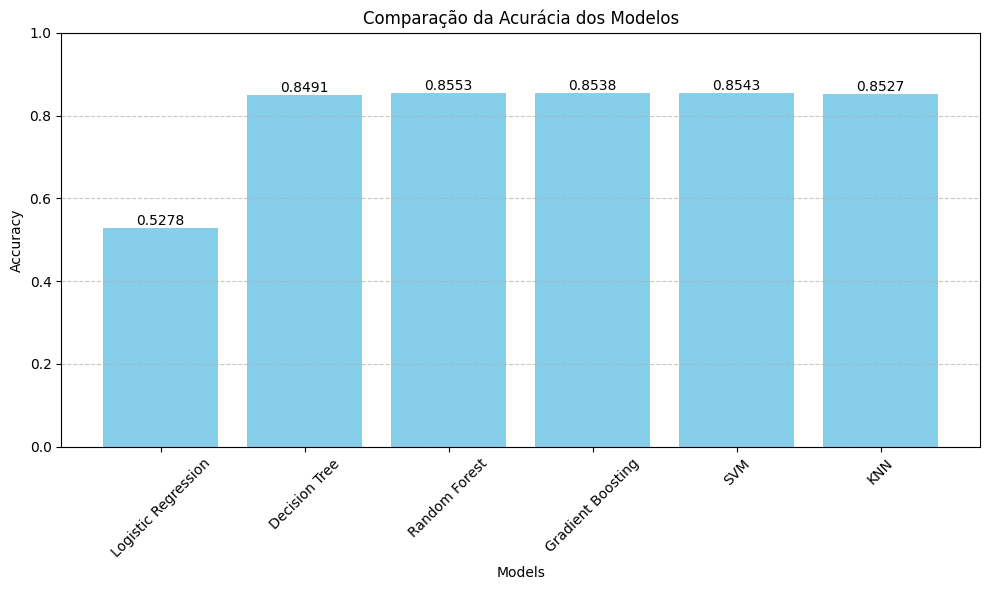

In [78]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparação da Acurácia dos Modelos')
plt.ylim(0.0, 1.0)  # Definindo o limite do eixo y para melhor visualização das diferenças
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando as acurácias acima das barras
for model, accuracy in model_accuracies.items():
    plt.text(model, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

### Passo 6: Melhoria do Melhor Modelo
Neste passo, iremos escolher o melhor modelo e tentar melhorá-lo.

In [81]:
# Escolhendo o melhor modelo (com base na acurácia)